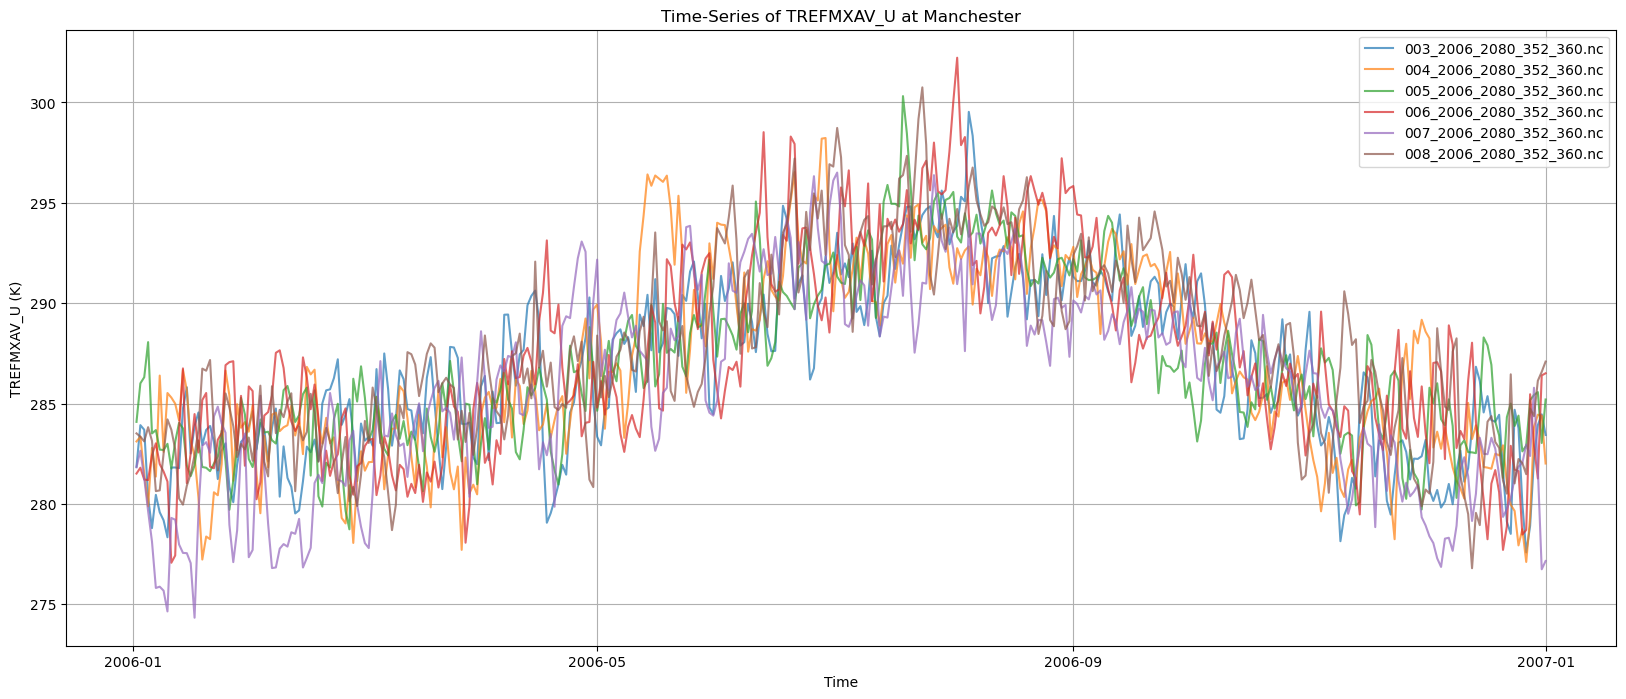

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os

## Sample figure for different datasets
# List of file names
file_names = [
    "003_2006_2080_352_360.nc",
    "004_2006_2080_352_360.nc",
    "005_2006_2080_352_360.nc",
    "006_2006_2080_352_360.nc",
    "007_2006_2080_352_360.nc",
    "008_2006_2080_352_360.nc"
]

# Manchester
lat_idx = 5
lon_idx = 4

plt.figure(figsize=(20, 8))
data_path = '/Users/hoonchoi/project_2/data'

for file_name in file_names:
    ds = xr.open_dataset(os.path.join(data_path, file_name))
    ts_data = ds['TREFMXAV_U'][0:365, lat_idx, lon_idx]
    ts_data.plot(label=file_name, alpha=0.7)

plt.legend()
plt.title('Time-Series of TREFMXAV_U at Manchester')
plt.xlabel('Time')
plt.ylabel('TREFMXAV_U (K)')
plt.grid(True)
plt.show()

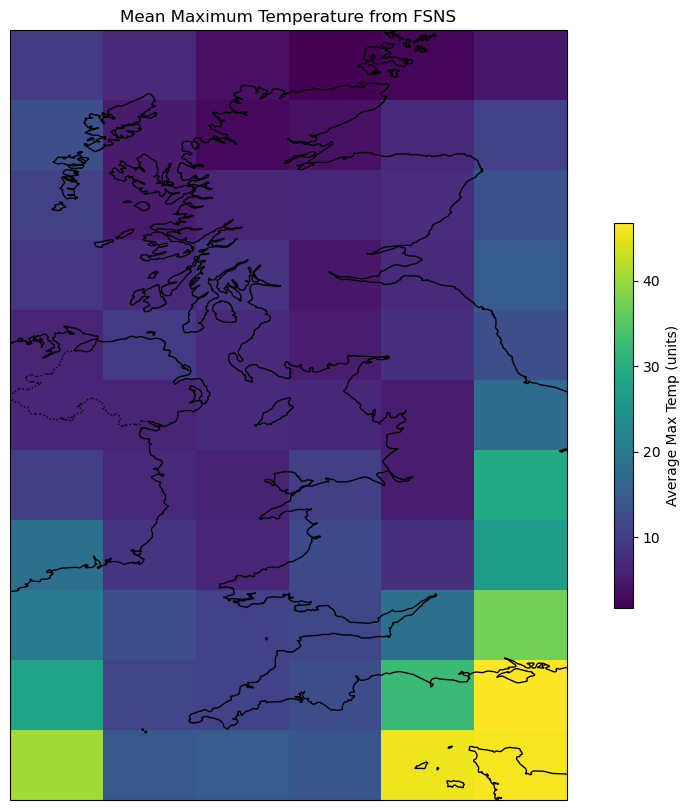

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

## Sample figure for single variable

ds = xr.open_dataset('/Users/hoonchoi/project_2/data/006_2006_2080_352_360.nc')
avg_temp = ds["FSNS"][0,:,:] #.mean(dim="time")

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
temp_plot = avg_temp.plot(ax=ax, transform=ccrs.PlateCarree(),
                          add_colorbar=True, cbar_kwargs={'shrink': 0.5, 'label': 'Average Max Temp (units)'})

plt.title('Mean Maximum Temperature from FSNS')
plt.show()

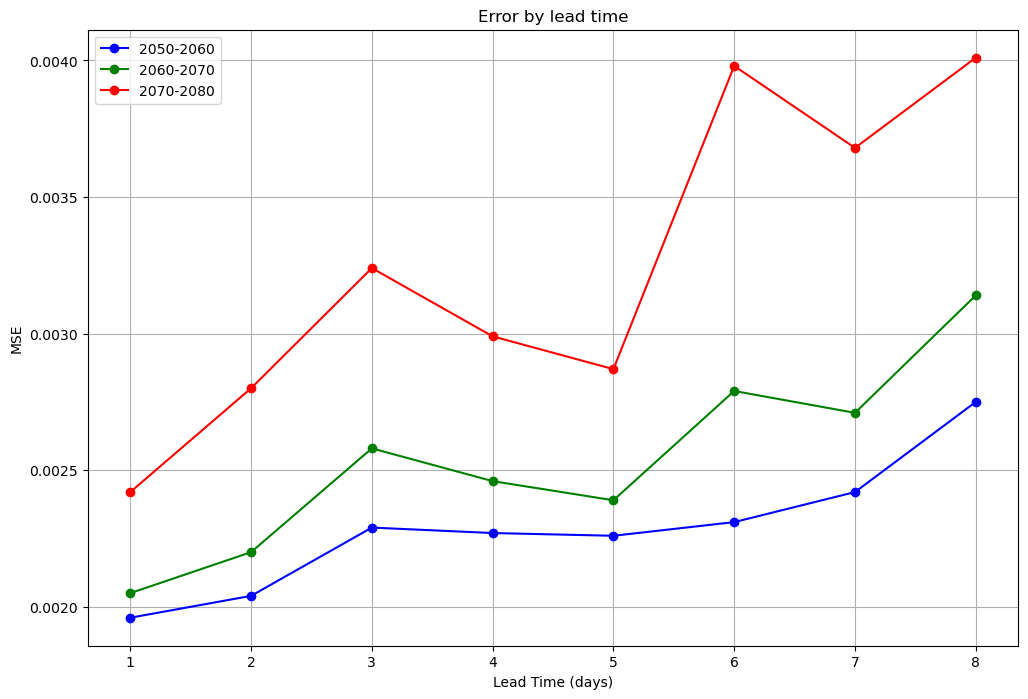

In [4]:
import matplotlib.pyplot as plt

## Error by lead time

new_losses = [
    [0.00196, 0.00205, 0.00242],
    [0.00204, 0.00220, 0.00280],
    [0.00229, 0.00258, 0.00324],
    [0.00227, 0.00246, 0.00299],
    [0.00226, 0.00239, 0.00287],
    [0.00231, 0.00279, 0.00398],
    [0.00242, 0.00271, 0.00368],
    [0.00275, 0.00314, 0.00401]
]

losses_by_test_set = {
    '2050-2060': [loss[0] for loss in new_losses],
    '2060-2070': [loss[1] for loss in new_losses],
    '2070-2080': [loss[2] for loss in new_losses]
}

lead_times_numbers = [str(i + 1) for i in range(len(new_losses))]

distinct_test_set_colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 8))
for i, (test_set, losses) in enumerate(losses_by_test_set.items()):
    plt.plot(lead_times_numbers, losses, marker='o', color=distinct_test_set_colors[i], label=f'{test_set}')

plt.title('Error by lead time')
plt.xlabel('Lead Time (days)')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

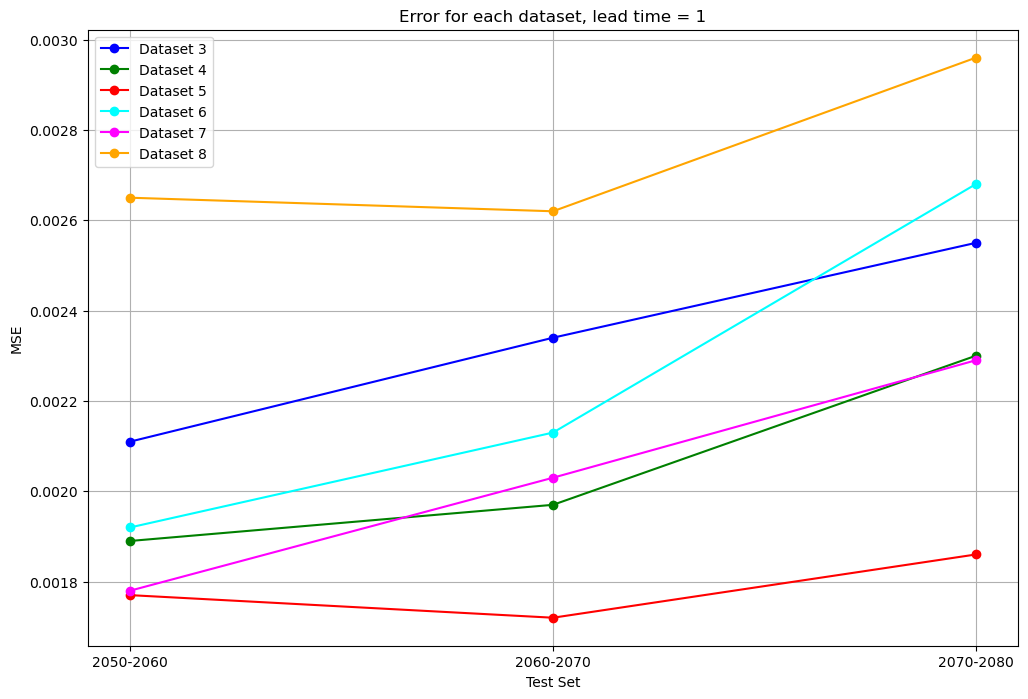

In [5]:
import matplotlib.pyplot as plt

# Error for each dataset
updated_losses = [
    [0.00211, 0.00234, 0.00255],
    [0.00189, 0.00197, 0.00230],
    [0.00177, 0.00172, 0.00186],
    [0.00192, 0.00213, 0.00268],
    [0.00178, 0.00203, 0.00229],
    [0.00265, 0.00262, 0.00296]
]

test_sets = ['2050-2060', '2060-2070', '2070-2080']
distinct_model_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange']

plt.figure(figsize=(12, 8))
for i, losses in enumerate(updated_losses):
    plt.plot(test_sets, losses, marker='o', color=distinct_model_colors[i], label=f'Dataset {i+3}')

plt.title('Error for each dataset, lead time = 1')
plt.xlabel('Test Set')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()